# Environment Setup and Library Import
Import necessary modules for single-cell methylation analysis.

In [1]:
import scanpy as sc
from scMethCraft.model.scmethcraft_model import *
from scMethCraft.model.scmethcraft_trainning import *
import scMethCraft.model.methyimp as mp
from scMethCraft.function.embedding import *
from scMethCraft.function.batch import *

# Data Loading
Load the preprocessed single-cell methylation data.

In [2]:
input_path = f"../project/sample_data/genome/"
raw_adata = sc.read(f"{input_path}/adata.h5ad")

# Parameter Initialization
Set key parameters for the analysis.

In [3]:
cell = raw_adata.shape[0]
kmer_k = 8
seq_length = 10000

# Model Loading
Initialize and load pre-trained scMethCraft models.

In [4]:
scMethCraft_part1 = Sequence_extraction(cell,K=kmer_k,genomic_seq_length = seq_length).to(device)
scMethCraft_part2 = Similarity_weighting(cell,dropout_rate=0.5).to(device)
modelpath = f"../project/sample_data/output/"
scMethCraft_part1.load_state_dict(torch.load(f"{modelpath}/scMethCraft_part1.pth"))
scMethCraft_part2.load_state_dict(torch.load(f"{modelpath}/scMethCraft_part2.pth"))


<All keys matched successfully>

# Cell Embedding Generation
Create low-dimensional embeddings from methylation data.  
**Note: without batch correction!**

In [5]:
adata = output_embedding(raw_adata,scMethCraft_part1,scMethCraft_part2)

2025-05-31 19:45:27.642159: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-31 19:45:27.682815: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-31 19:45:28.362520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


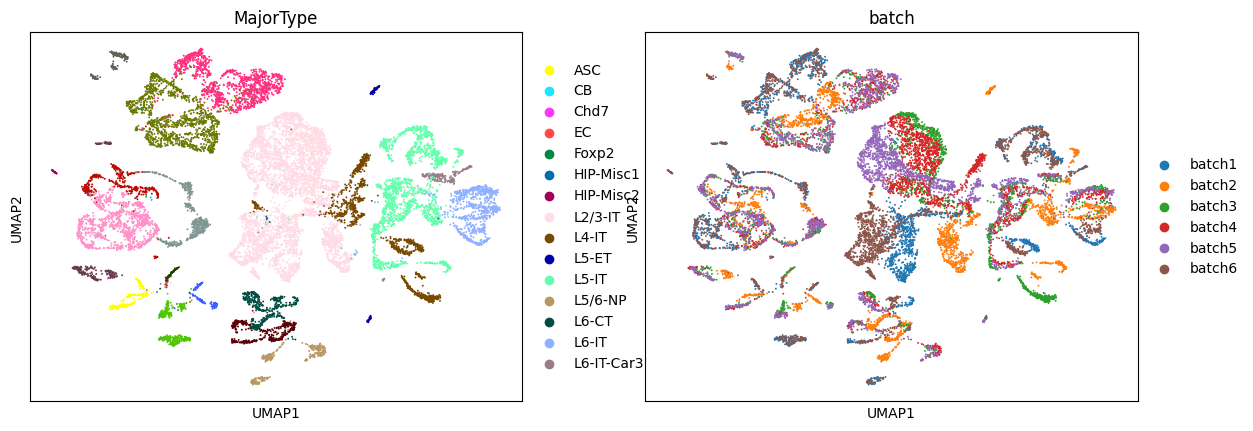

In [6]:
mp.create_umap_embedding(adata,embedding="Cell_embedding",color = ["MajorType","batch"])

# Batch Effect Correction

In [7]:
adata = output_batch_integration(raw_adata,scMethCraft_part1,scMethCraft_part2)

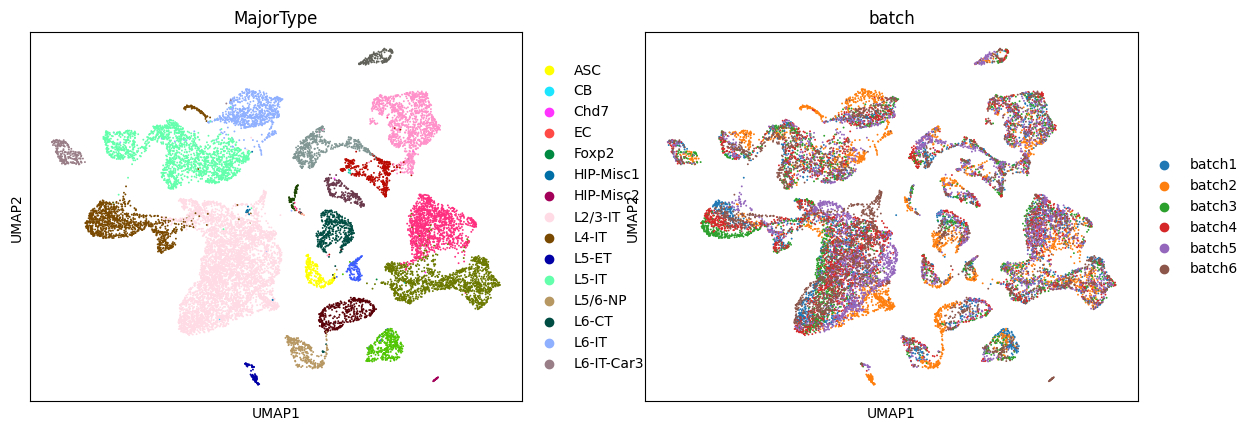

In [11]:
mp.create_umap_embedding(adata,embedding="Cell_embedding",color = ["MajorType","batch"])